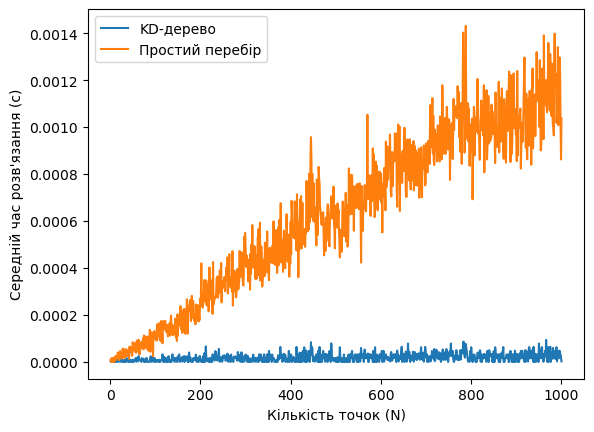

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

class Node:
    def __init__(self, point):
        self.point = point
        self.left = None
        self.right = None

class KDTree:
    def __init__(self, points):
        self.root = self.build_kd_tree(points)

    def build_kd_tree(self, points, depth=0):
        if len(points) == 0:
            return None

        axis = depth % len(points[0])
        points = sorted(points, key=lambda point: point[axis])
        median = len(points) // 2

        node = Node(points[median])
        node.left = self.build_kd_tree(points[:median], depth + 1)
        node.right = self.build_kd_tree(points[median + 1:], depth + 1)

        return node

    def count_points_in_rectangle(self, rect):
        count = 0
        stack = [(self.root, 0)]

        while stack:
            node, depth = stack.pop()
            if node:
                if rect_contains(rect, node.point):
                    count += 1
                if node.left and rect_intersects(rect, node.left.point, depth):
                    stack.append((node.left, depth + 1))
                if node.right and rect_intersects(rect, node.right.point, depth):
                    stack.append((node.right, depth + 1))

        return count

def rect_contains(rect, point):
    x1, y1, x2, y2 = rect
    x, y = point
    return x1 <= x <= x2 and y1 <= y <= y2

def rect_intersects(rect, point, depth):
    x1, y1, x2, y2 = rect
    x, y = point
    if depth % 2 == 0:
        return x1 <= x <= x2
    else:
        return y1 <= y <= y2

def generate_points(n):
    return np.random.rand(n, 2)

def generate_rectangles():
    return np.random.rand(1000, 4)

def brute_force_count(rect, points):
    count = 0
    for point in points:
        if rect_contains(rect, point):
            count += 1
    return count

def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time, result

if __name__ == '__main__':
    N_values = range(1, 1001)
    kd_tree_times = []
    brute_force_times = []

    for N in N_values:
        points = generate_points(N)
        rectangles = generate_rectangles()

        kd_tree_total_time = 0
        brute_force_total_time = 0

        for rect in rectangles:
            kd_tree_time, _ = measure_time(KDTree(points).count_points_in_rectangle, rect)
            brute_force_time, _ = measure_time(brute_force_count, rect, points)

            kd_tree_total_time += kd_tree_time
            brute_force_total_time += brute_force_time

        kd_tree_avg_time = kd_tree_total_time / len(rectangles)
        brute_force_avg_time = brute_force_total_time / len(rectangles)

        kd_tree_times.append(kd_tree_avg_time)
        brute_force_times.append(brute_force_avg_time)

    plt.plot(N_values, kd_tree_times, label='KD-дерево')
    plt.plot(N_values, brute_force_times, label='Простий перебір')
    plt.xlabel('Кількість точок (N)')
    plt.ylabel('Середній час розв\'язання (с)')
    plt.legend()
    plt.show()
